In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Load Enriched Data

In [2]:
df = pd.read_csv("../data/processed/ethiopia_fi_enriched.csv")


# Dataset Overview

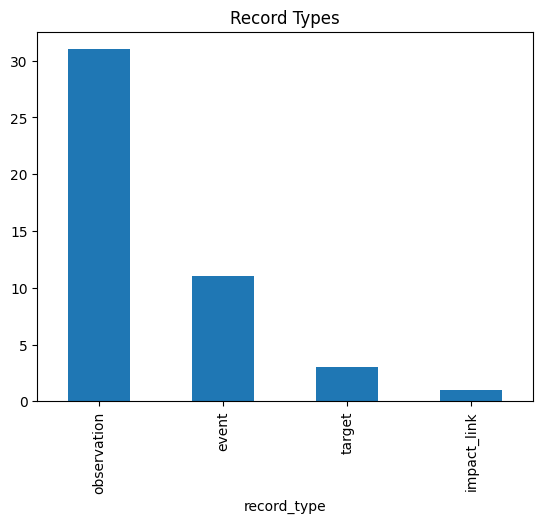

In [3]:
df['record_type'].value_counts().plot(kind='bar', title='Record Types')
plt.show()


# Confidence Distribution

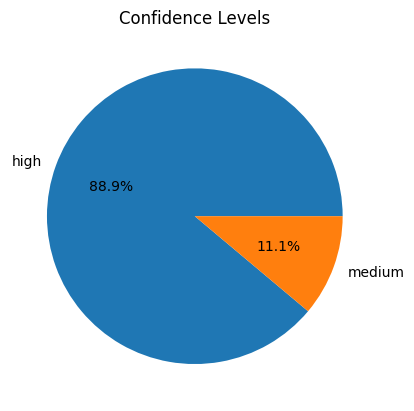

In [4]:
df['confidence'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title("Confidence Levels")
plt.show()


# Account Ownership Trend

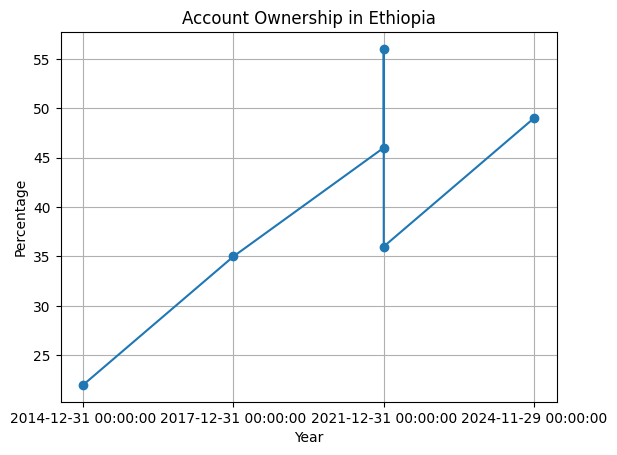

In [5]:
access = df[
    (df['record_type'] == 'observation') &
    (df['indicator_code'] == 'ACC_OWNERSHIP')
]

plt.plot(access['observation_date'], access['value_numeric'], marker='o')
plt.title("Account Ownership in Ethiopia")
plt.xlabel("Year")
plt.ylabel("Percentage")
plt.grid(True)
plt.show()


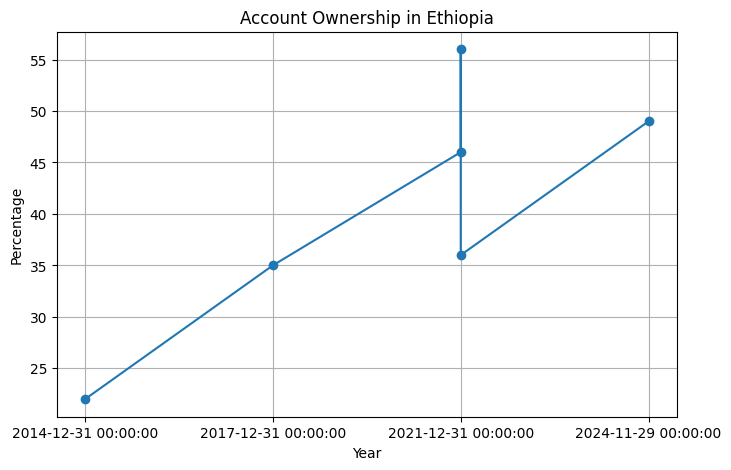

In [10]:
plt.figure(figsize=(8, 5))
plt.plot(access['observation_date'], access['value_numeric'], marker='o')
plt.title("Account Ownership in Ethiopia")
plt.xlabel("Year")
plt.ylabel("Percentage")
plt.grid(True)

# SAVE FIGURE
plt.savefig("../reports/figures/account_ownership_trend.png", dpi=300, bbox_inches="tight")
plt.show()

# Growth Rate Calculation

In [6]:
access = access.sort_values('observation_date')
access['growth_pp'] = access['value_numeric'].diff()
access[['observation_date', 'value_numeric', 'growth_pp']]


,observation_date,value_numeric,growth_pp
0,2014-12-31 00:00:00,22.0,NaN
1,2017-12-31 00:00:00,35.0,13.0
2,2021-12-31 00:00:00,46.0,11.0
3,2021-12-31 00:00:00,56.0,10.0
4,2021-12-31 00:00:00,36.0,-20.0
5,2024-11-29 00:00:00,49.0,13.0


# Digital Payment Usage

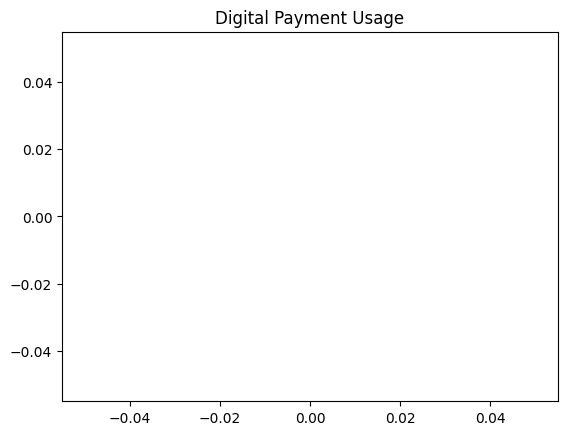

In [7]:
usage = df[
    (df['record_type'] == 'observation') &
    (df['indicator_code'] == 'USG_DIGITAL_PAYMENT')
]

plt.plot(usage['observation_date'], usage['value_numeric'], marker='o')
plt.title("Digital Payment Usage")
plt.show()


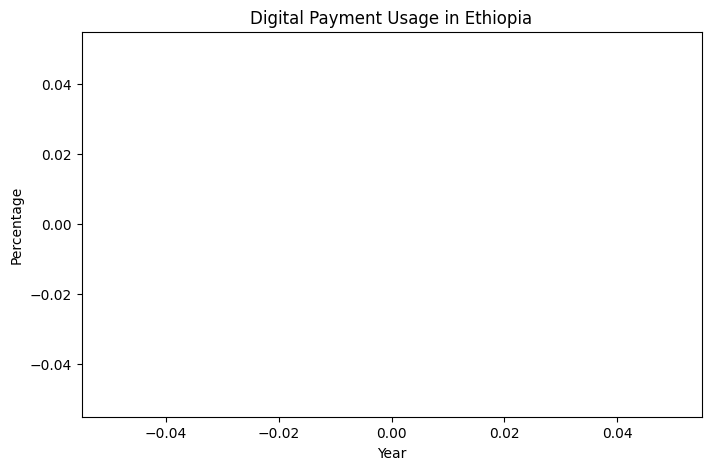

In [11]:
plt.figure(figsize=(8, 5))
plt.plot(usage['observation_date'], usage['value_numeric'], marker='o')
plt.title("Digital Payment Usage in Ethiopia")
plt.xlabel("Year")
plt.ylabel("Percentage")

plt.savefig("../reports/figures/digital_payment_usage.png", dpi=300, bbox_inches="tight")
plt.show()


# Event Timeline

In [8]:
events = df[df['record_type'] == 'event']
events[['event_date', 'event_name', 'category']].sort_values('event_date')


,event_date,event_name,category
44,2023-01-01,Fayda Digital ID National Rollout,policy
33,NaN,NaN,product_launch
34,NaN,NaN,market_entry
35,NaN,NaN,product_launch
36,NaN,NaN,infrastructure
37,NaN,NaN,policy
38,NaN,NaN,milestone
39,NaN,NaN,partnership
40,NaN,NaN,infrastructure
41,NaN,NaN,policy


# Correlation Analysis

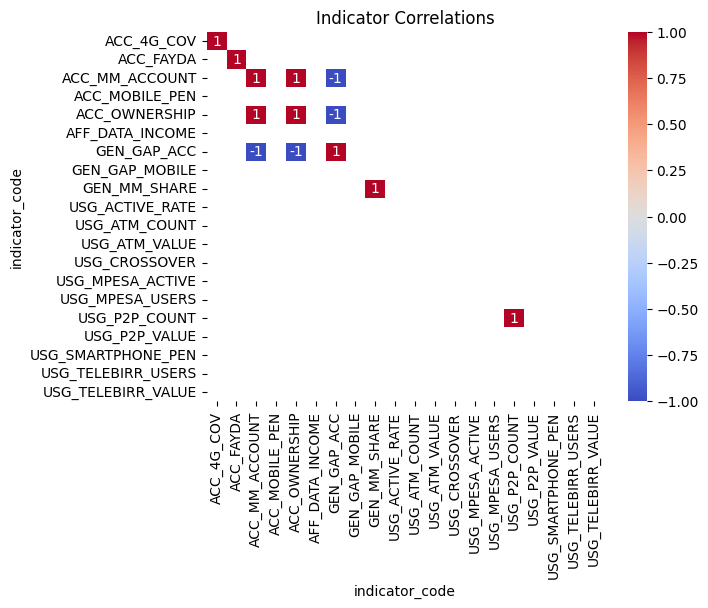

In [9]:
pivot = df.pivot_table(
    values='value_numeric',
    index='observation_date',
    columns='indicator_code'
)

sns.heatmap(pivot.corr(), annot=True, cmap='coolwarm')
plt.title("Indicator Correlations")
plt.show()


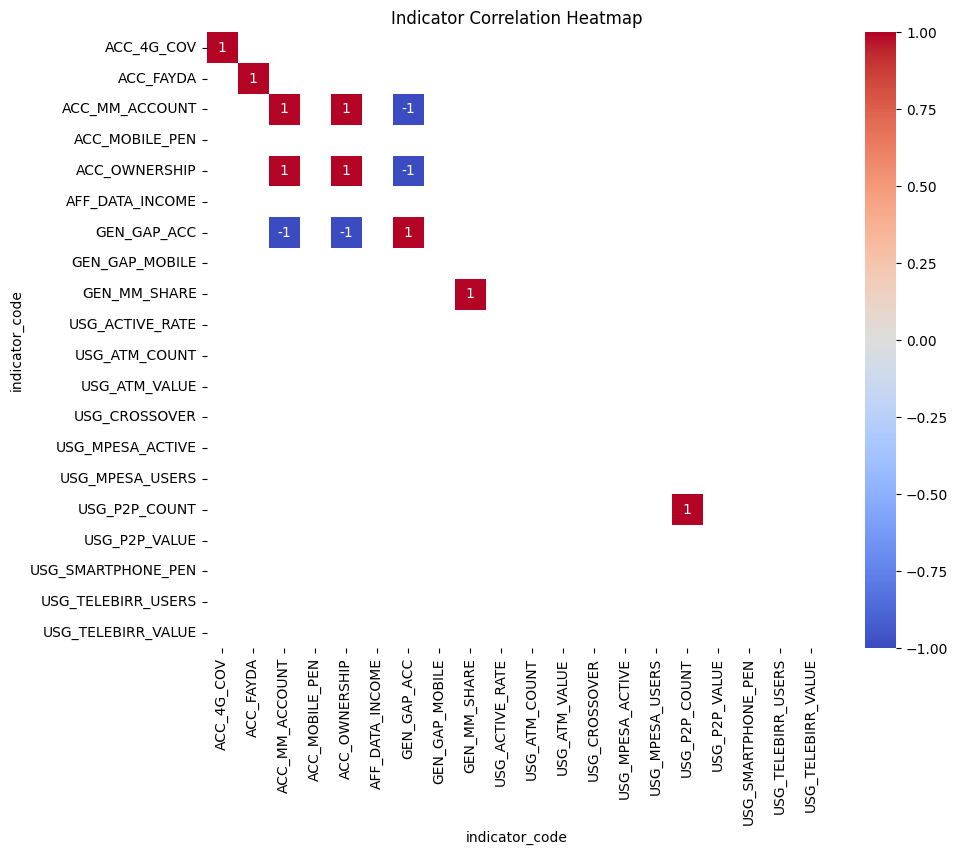

In [12]:


plt.figure(figsize=(10, 8))
sns.heatmap(pivot.corr(), annot=True, cmap="coolwarm")
plt.title("Indicator Correlation Heatmap")

plt.savefig("../reports/figures/indicator_correlation_heatmap.png", dpi=300, bbox_inches="tight")
plt.show()


# Key Insights

1. Account ownership growth slowed significantly between 2021 and 2024.
2. Mobile money expansion did not translate into proportional ownership gains.
3. Digital payment usage exceeds mobile money account ownership.
4. Infrastructure-related indicators correlate more with usage than access.
5. Event impacts appear with time lags rather than immediate effects.